# Setup de los datos y catálogos

In [64]:
#Importamos librerias a utilizar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as mt

In [65]:
#Importamos los datos 
datos = pd.read_csv('datos_abiertos_covid19/200527COVID19MEXICO.csv')

#Importamos 

In [66]:
#Vemos las estructura que tienen los datos
datos.head()

,ID_REGISTRO,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,UCI
0,1ba22b,3,25,2,25,2,23/04/2020,16/04/2020,27/04/2020,1,...,2,2,1,1,1,2,2,99,1,2
1,00b59f,3,27,2,27,2,24/04/2020,20/04/2020,9999-99-99,2,...,2,2,2,2,2,2,2,1,1,1
2,157def,4,2,2,26,2,08/04/2020,08/04/2020,9999-99-99,2,...,2,2,2,2,2,2,2,99,1,2
3,170aea,4,9,2,15,1,16/04/2020,08/04/2020,29/04/2020,97,...,2,2,1,2,2,2,1,99,1,97
4,01dea4,4,9,2,9,1,20/04/2020,07/04/2020,30/04/2020,97,...,2,2,2,2,1,2,2,99,1,97


Las columnas que tienen solo números, tienen su respectivo diccionario (qué significa cada cosa), primero añado los catalogos:

In [67]:
si_no = {
        '1':'SI', 
        '2':'NO', 
        '97':'NO APLICA', 
        '98':'SE IGNORA', 
        '99':'NO ESPECIFICADO'}

sexo = {
        '1':'MUJER',
        '2':'HOMBRE',
        '99':'NO ESPECIFICADO'
        }

sector = {
        '1': 'CRUZ ROJA',
        '2': 'DIF',
        '3': 'ESTATAL',
        '4': 'IMSS',
        '5': 'IMSS-BIENESTAR',
        '6': 'ISSSTE',
        '7': 'MUNICIPAL',
        '8': 'PEMEX',
        '9': 'PRIVADA',
        '10': 'SEDENA',
        '11': 'SEMAR',
        '12': 'SSA',
        '13': 'UNIVERSITARIO',
        '99': 'NO ESPECIFICADO'
        }

paciente = {
        '1':'AMBULATORIO',
        '2':'HOSPITALIZADO',
        '99':'NO ESPECIFICADO'
        }

resultado = {
        '1':'Positivo SARS-CoV-2',
        '2':'No positivo SARS-CoV-2',
        '3':'Resultado pendiente'
        }

entidades = {
        '01': 'AGUASCALIENTES',
        '02': 'BAJA CALIFORNIA',
        '03': 'BAJA CALIFORNIA SUR',
        '04': 'CAMPECHE',
        '05': 'COAHUILA DE ZARAGOZA',
        '06': 'COLIMA',
        '07': 'CHIAPAS',
        '08': 'CHIHUAHUA',
        '09': 'CIUDAD DE MÉXICO',
        '10': 'DURANGO',
        '11': 'GUANAJUATO',
        '12': 'GUERRERO',
        '13': 'HIDALGO',
        '14': 'JALISCO',
        '15': 'MÉXICO',
        '16': 'MICHOACÁN DE OCAMPO',
        '17': 'MORELOS',
        '18': 'NAYARIT',
        '19': 'NUEVO LEÓN',
        '20': 'OAXACA',
        '21': 'PUEBLA',
        '22': 'QUERÉTARO',
        '23': 'QUINTANA ROO',
        '24': 'SAN LUIS POTOSÍ',
        '25': 'SINALOA',
        '26': 'SONORA',
        '27': 'TABASCO',
        '28': 'TAMAULIPAS',
        '29': 'TLAXCALA',
        '30': 'VERACRUZ DE IGNACIO DE LA LLAVE',
        '31': 'YUCATÁN',
        '32': 'ZACATECAS',
        '36': 'ESTADOS UNIDOS MEXICANOS',
        '97': 'NO APLICA',
        '98': 'SE IGNORA',
        '99': 'NO ESPECIFICADO'
}

Ahora creo un diccionario de que cátalogo le corresponde cada columna del dataframe:

In [68]:
columna = {
        'SECTOR': sector,                                                            
        'ENTIDAD_UM': entidades,
        'SEXO': sexo,                    
        'ENTIDAD_RES': entidades,
        'TIPO_PACIENTE': paciente,
        'RESULTADO': resultado,
        'INTUBADO':si_no,	                                                             
        'NEUMONIA':si_no,                                                          
        'EMBARAZO':si_no,	                                                              
        'DIABETES':si_no,	                                                                
        'EPOC':si_no,                                                           
        'ASMA':si_no,                                                               
        'INMUSUPR':si_no,	                                                                
        'HIPERTENSION':si_no,                                                                 
        'CARDIOVASCULAR':si_no,	                                                                 
        'OBESIDAD':si_no,                                                                  
        'RENAL_CRONICA':si_no,                                                       
        'TABAQUISMO':si_no,	                                                            
        'OTRO_CASO':si_no,	                                                                       
        'UCI':si_no                                                                  
}

In [69]:
#Ejemplo de uso
print(columna['SEXO']['2'])

print(columna['ENTIDAD_RES']['05'])

HOMBRE
COAHUILA DE ZARAGOZA


# Probabilidad de muerte dada una complicación de salud previa

En este caso calcularemos la probabilidad de morir dado que se tiene cierta complicación de salud. (**Ojo:** Toda la muestra de analisis está confirmada con Coronavirus). 

In [70]:
#Filtramos unicamente los casos positivos confirmados 
enfermos = datos[datos['RESULTADO'] == 1]

enfermos.columns

Index(['ID_REGISTRO', 'SECTOR', 'ENTIDAD_UM', 'SEXO', 'ENTIDAD_RES',
       'TIPO_PACIENTE', 'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF',
       'INTUBADO', 'NEUMONIA', 'EDAD', 'EMBARAZO', 'DIABETES', 'EPOC', 'ASMA',
       'INMUSUPR', 'HIPERTENSION', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'RESULTADO', 'UCI'],
      dtype='object')

In [77]:
#Obtenemos la probabilidad general de muertes
enfermos_totales = len(enfermos)
muertos_totales = len(enfermos[enfermos['FECHA_DEF'] != '9999-99-99'])
hospitalizados_totales = len(enfermos[enfermos['TIPO_PACIENTE'] == 2])

p_general_muerte = muertos_totales/enfermos_totales
p_general_hosp = hospitalizados_totales/enfermos_totales
print(p_general_muerte, p_general_hosp)

0.11018545813413994 0.3620470886789793


In [78]:
#Obtenemos la probabilidad de muerte de una persona sin complicaciones de salud
complicaciones = enfermos.columns[12:22]   #Los nombres de las complicaciones

sin_comp = datos[datos['RESULTADO'] == 1]  #Filtro solo confirmados ccon COVID

for i, complicacion in enumerate(complicaciones):
    sin_comp = sin_comp[sin_comp[complicacion] == 2] #Filtro todas las enfermedades
    
n_sin_comp = len(sin_comp)
hosp_sin_comp = len(sin_comp[sin_comp['TIPO_PACIENTE'] == 2])
muertos_sin_comp = len(sin_comp[sin_comp['FECHA_DEF'] != '9999-99-99'])

p_sano_muerte = muertos_sin_comp/n_sin_comp
p_sano_hosp = hosp_sin_comp/n_sin_comp

print(p_sano, p_sano_hosp)

0.03169263456090651 0.18047686496694995


In [79]:
# Obtenemos los diferentes datos para cada tipo de complicación de salud

p_muerte_comp = [] #Aqui guardaremos los datos

for i, complicacion in enumerate(complicaciones):
    p_muerte_comp.append([])
    p_muerte_comp[i].append(complicacion)  #Anexamos el nombre de la complicacion
    
    casos = enfermos[enfermos[complicacion] == 1]
    n_casos = len(casos)   
    p_muerte_comp[i].append(n_casos)  #Número de casos con esa complicación
    
    n_hospitalizado = len(casos[casos['TIPO_PACIENTE'] == 2])
    p_muerte_comp[i].append(n_hospitalizado)  #Número de personas hospitalizadas con esa complicación
    
    muertos = casos[casos['FECHA_DEF'] != '9999-99-99']
    n_muertos = len(muertos)
    p_muerte_comp[i].append(n_muertos)  #Número de muertos con esa complicacion de salud
    
    probabilidad_muerte = n_muertos/n_casos   #Probabilidad condicional de muerte
    p_muerte_comp[i].append(probabilidad_muerte)
    
    probabilidad_h = n_hospitalizado/n_casos
    p_muerte_comp[i].append(probabilidad_h)   #Probabilidad condicional de hospitalización
    
p_muerte_comp.append(['GENERAL', enfermos_totales, hospitalizados_totales, 
                      muertos_totales, p_general_muerte, p_general_hosp])  # Añado el general nacional
p_muerte_comp.append(['SANOS', n_sin_comp, hosp_sin_comp,
                      muertos_sin_comp, p_sano_muerte, p_sano_hosp])   #Añado el caso sin complicaciones
    
p_muerte_comp = pd.DataFrame(p_muerte_comp, columns = ['Complicación', 'Casos',  'Hospitalizados',
                                                       'Defunciones', 'Probabilidad muerte', 
                                                       'Probabilidad hospitalizacion'])
p_muerte_comp

,Complicación,Casos,Hospitalizados,Defunciones,Probabilidad muerte,Probabilidad hospitalizacion
0,EMBARAZO,486,152,13,0.026749,0.312757
1,DIABETES,13854,8579,3223,0.232640,0.619244
2,EPOC,1588,1062,481,0.302897,0.668766
3,ASMA,2290,669,196,0.085590,0.292140
4,INMUSUPR,1216,730,262,0.215461,0.600329
5,HIPERTENSION,16444,9297,3583,0.217891,0.565373
6,CARDIOVASCULAR,2056,1175,487,0.236868,0.571498
7,OBESIDAD,16053,6784,2306,0.143649,0.422600
8,RENAL_CRONICA,1840,1318,595,0.323370,0.716304
9,TABAQUISMO,6470,2444,812,0.125502,0.377743


### Graficamos probabilidad de muerte

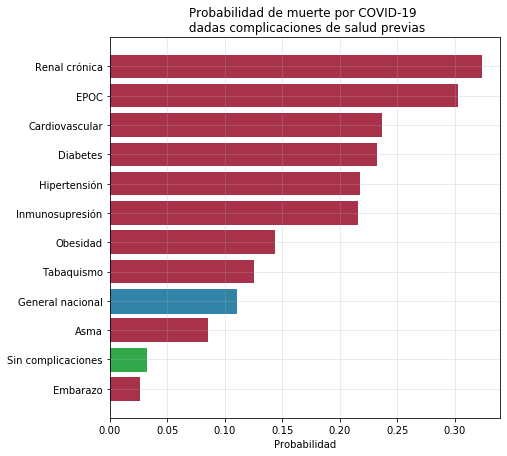

In [182]:
ordenados = p_muerte_comp.sort_values(by='Probabilidad muerte') #Ordenamos de acuerdo a la probabilidad

index = ordenados['Complicación']
labels = ['Renal crónica', 'EPOC', 'Cardiovascular', 'Diabetes', 
          'Hipertensión', 'Inmunosupresión', 'Obesidad', 'Tabaquismo', 
          'General nacional', 'Asma', 'Sin complicaciones', 'Embarazo']

y = ordenados['Probabilidad muerte']
x = [i for i in range(len(index))]

fig, ax = plt.subplots(figsize = (7,7))

grafica = ax.barh(x, y, color = '#a8324a')

grafica[1].set_color('#32a84c')
grafica[3].set_color('#3283a8')

ax.grid(alpha = 0.3)
ax.set_title('Probabilidad de muerte por COVID-19 \n dadas complicaciones de salud previas')
plt.yticks([11, 10, 9, 8,7,6,5,4,3,2,1,0])
ax.set_yticklabels(labels)
ax.set_xlabel('Probabilidad')

plt.show()

### Graficamos probabiliada de hospitalización

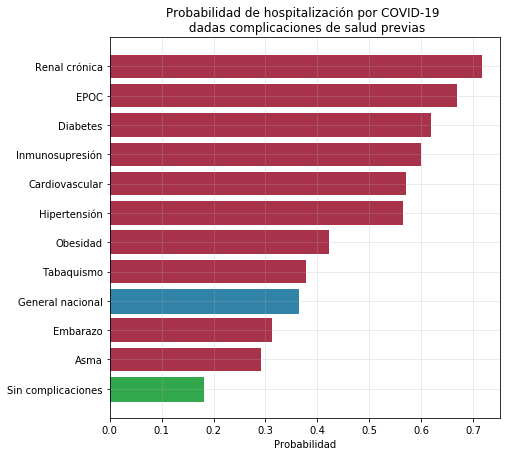

In [181]:
ordenados = p_muerte_comp.sort_values(by='Probabilidad hospitalizacion') #Ordenamos de acuerdo a la probabilidad

index = ordenados['Complicación']
labels = ['Renal crónica', 'EPOC', 'Diabetes', 'Inmunosupresión', 'Cardiovascular',  
          'Hipertensión',  'Obesidad', 'Tabaquismo', 
          'General nacional', 'Embarazo', 'Asma', 'Sin complicaciones']

y = ordenados['Probabilidad hospitalizacion']
x = [i for i in range(len(index))]

fig, ax = plt.subplots(figsize = (7,7))

grafica = ax.barh(x, y, color = '#a8324a')

grafica[0].set_color('#32a84c')
grafica[3].set_color('#3283a8')

ax.grid(alpha = 0.3)
ax.set_title('Probabilidad de hospitalización por COVID-19 \n dadas complicaciones de salud previas')
plt.yticks([11, 10, 9, 8,7,6,5,4,3,2,1,0])
ax.set_yticklabels(labels)
ax.set_xlabel('Probabilidad')

plt.show()

# Tipo de paciente por grupo de edad

Separamos la información por grupo de edad:

In [106]:
data = datos.copy()  #Creamos copia de los datos

bins = [x*10 for x in range(11)]  #Creamos los limites de los grupos

edad = []

for i in range(10):
    #Creamos array booleano selector
    menores = data['EDAD'] < bins[i+1]
    mayores = data['EDAD'] >= bins[i]
    tomar = []
    for j in range(len(data)):
        tomar.append(menores[j] and mayores[j])
        
    #Anexamos resultado
    edad.append([])
    edad[i].append(f'{bins[i]}-{bins[i+1]-1}')
    edad[i].append(data[tomar])

In [107]:
#Tenemos esta información entonces:
print('Grupo de edad:', edad[6][0])
edad[6][1].head()

Grupo de edad: 60-69


,ID_REGISTRO,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,UCI
5,0fcdb4,4,15,2,15,2,21/04/2020,13/04/2020,9999-99-99,2,...,2,2,2,2,2,2,2,99,1,2
9,167559,4,9,2,9,1,18/04/2020,17/04/2020,9999-99-99,97,...,2,2,1,2,2,2,1,99,1,97
16,71944,4,14,2,14,2,04/05/2020,04/05/2020,9999-99-99,2,...,2,2,1,2,2,2,2,99,1,2
19,02a928,4,7,2,7,2,07/04/2020,07/04/2020,9999-99-99,2,...,2,2,2,2,1,2,2,99,1,2
20,15553,4,2,2,2,2,09/04/2020,04/04/2020,9999-99-99,2,...,2,2,1,2,2,2,2,99,1,2


Separamos cada grupo de edad por tipo de paciente: ambulatorio u hospitalizado:

In [183]:
casos_edad = []

for i in range(10):
    
    totales = len(edad[i][1])
    ambulatorio = len(edad[i][1][edad[i][1]['TIPO_PACIENTE'] == 1])
    hospitalizado = totales - ambulatorio
    
    muertos = len(edad[i][1][edad[i][1]['FECHA_DEF']  != '9999-99-99'])
    p_muerte = muertos/totales
    p_hosp = hospitalizado/totales
    
    casos_edad.append([edad[i][0], totales, ambulatorio, hospitalizado, muertos, p_muerte, p_hosp])
    
grupo_edad = pd.DataFrame(casos_edad, columns = ['Grupo de edad', 'Casos totales', 'Ambulatorios',
                                                 'Hospitalizados', 'Fallecidos', 'Probabilidad de muerte',
                                                'Probabilidad de hospitalización'])

grupo_edad

,Grupo de edad,Casos totales,Ambulatorios,Hospitalizados,Fallecidos,Probabilidad de muerte,Probabilidad de hospitalización
0,0-9,6804,4153,2651,137,0.020135,0.389624
1,10-19,7447,6342,1105,65,0.008728,0.148382
2,20-29,38783,35294,3489,241,0.006214,0.089962
3,30-39,59608,52837,6771,720,0.012079,0.113592
4,40-49,53918,43360,10558,1804,0.033458,0.195816
5,50-59,39670,26883,12787,3009,0.075851,0.322334
6,60-69,21688,10869,10819,3096,0.142752,0.498847
7,70-79,10965,4101,6864,2142,0.195349,0.625992
8,80-89,4886,1674,3212,1068,0.218584,0.657388
9,90-99,1026,409,617,189,0.184211,0.601365


### Graficamos tipo de paciente por edad (histograma):

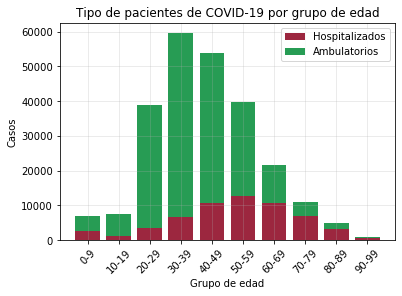

In [184]:
labels = [f'{x*10}-{(x+1)*10-1}' for x in range(10)]

plt.bar(labels, list(grupo_edad['Hospitalizados']), label = 'Hospitalizados', color = '#9c273f')
plt.bar(labels, list(grupo_edad['Ambulatorios']), label = 
        'Ambulatorios', bottom = list(grupo_edad['Hospitalizados']), color = '#279c54')

plt.legend()
plt.xlabel('Grupo de edad')
plt.ylabel('Casos')
plt.xticks(rotation = 45)
plt.title('Tipo de pacientes de COVID-19 por grupo de edad')
plt.grid(alpha = 0.3)
plt.show()

### Graficamos probabilidad de hospitalización o muerte por edad

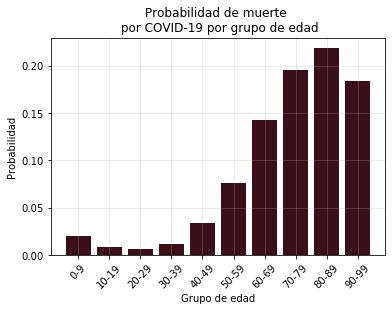

In [188]:
labels = [f'{x*10}-{(x+1)*10-1}' for x in range(10)]

y = grupo_edad['Probabilidad de muerte']

plt.bar(labels, y, color = '#3b0f1a')

plt.xlabel('Grupo de edad')
plt.ylabel('Probabilidad')
plt.xticks(rotation = 45)
plt.title('Probabilidad de muerte \n por COVID-19 por grupo de edad')
plt.grid(alpha = 0.3)
plt.show()

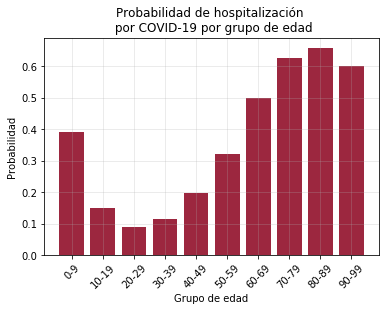

In [189]:
labels = [f'{x*10}-{(x+1)*10-1}' for x in range(10)]

y = grupo_edad['Probabilidad de hospitalización']

plt.bar(labels, y, color = '#9c273f')

plt.xlabel('Grupo de edad')
plt.ylabel('Probabilidad')
plt.xticks(rotation = 45)
plt.title('Probabilidad de hospitalización \n por COVID-19 por grupo de edad')
plt.grid(alpha = 0.3, )
plt.show()